<a href="https://colab.research.google.com/github/Anbarasu2410/DATA-ANALYST-INTERN-TASK-/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
from matplotlib.backends.backend_pdf import PdfPages

# ---------------------------
# 1. Upload Dataset
# ---------------------------
uploaded = files.upload()

Saving train.csv to train (1).csv


In [3]:
# ---------------------------
# 2. Load Dataset
# ---------------------------
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 3. Basic Info & Summary
# ---------------------------
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


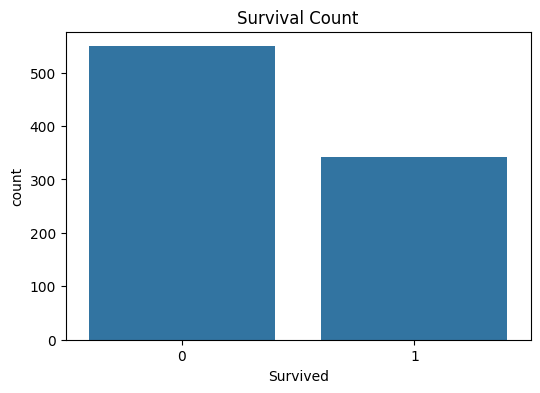

In [5]:
# Observations:
# Age, Cabin, and Embarked have missing values.
# Dataset has 891 rows and 12 columns.

# ---------------------------
# 4. Survival Count
# ---------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()
# Observation: Majority of passengers did not survive.



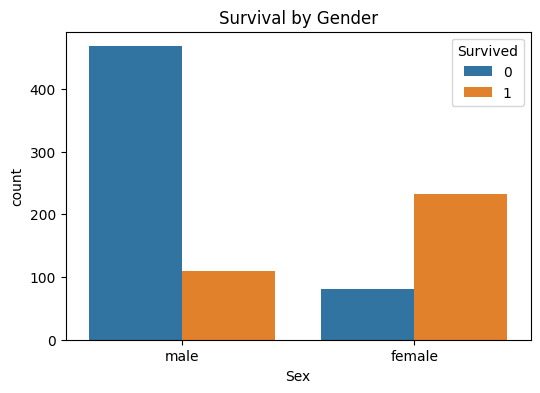

In [6]:
# ---------------------------
# 5. Sex vs Survival
# ---------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()
# Observation: Females had much higher survival than males.

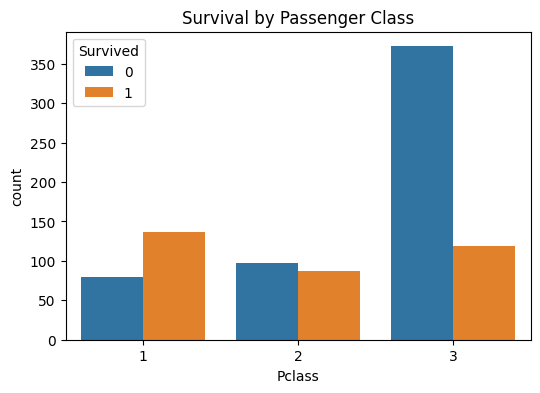

In [7]:
# ---------------------------
# 6. Pclass vs Survival
# ---------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()
# Observation: Higher-class passengers had better survival chances.

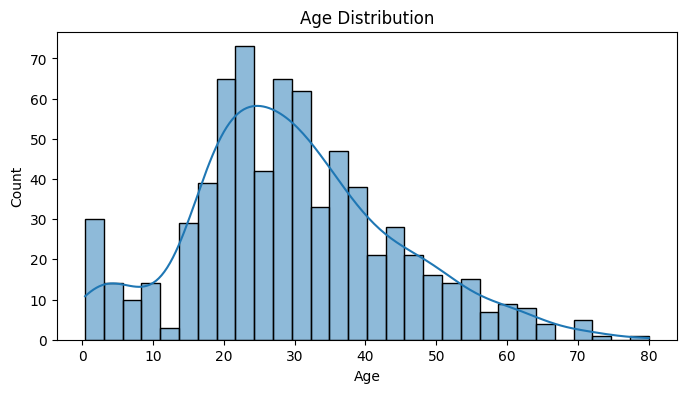

In [8]:
# ---------------------------
# 7. Age Distribution
# ---------------------------
plt.figure(figsize=(8,4))
sns.histplot(df["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()
# Observation: Most passengers were between 20-40 years old.

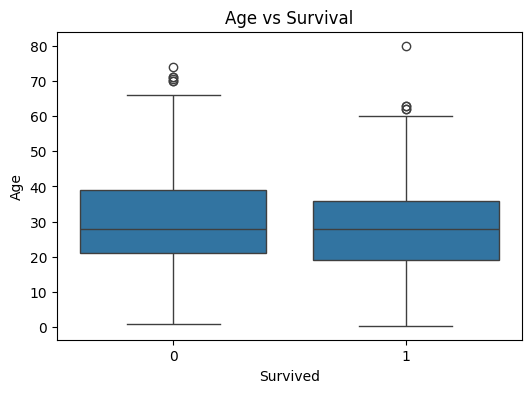

In [9]:
# ---------------------------
# 8. Boxplot: Age vs Survival
# ---------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survival")
plt.show()
# Observation: Younger passengers had slightly higher survival rates.

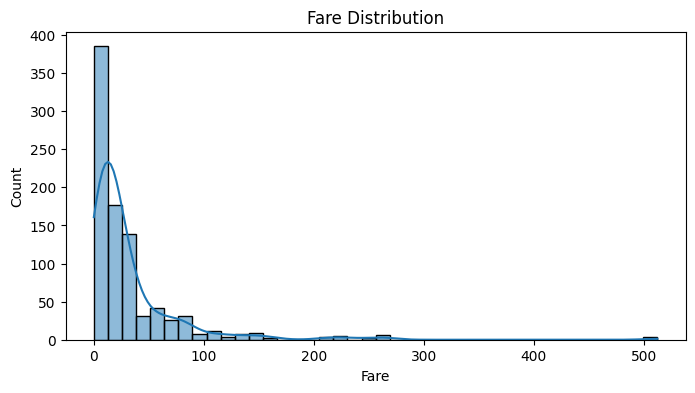

In [10]:
# ---------------------------
# 9. Fare Distribution
# ---------------------------
plt.figure(figsize=(8,4))
sns.histplot(df["Fare"], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()
# Observation: Fare is right-skewed; some passengers paid much higher.

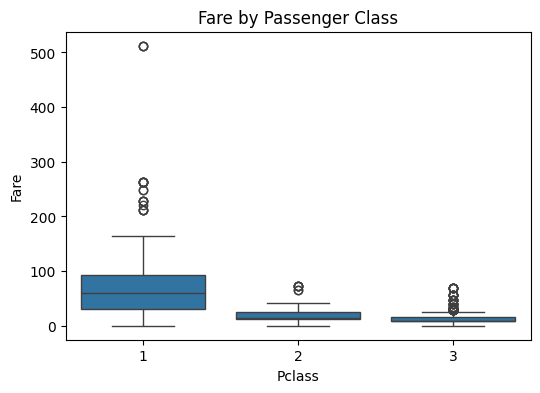

In [12]:
# ---------------------------
# 10. Boxplot: Fare by Class
# ---------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.title("Fare by Passenger Class")
plt.show()
# Observation: Higher classes paid significantly higher fares.


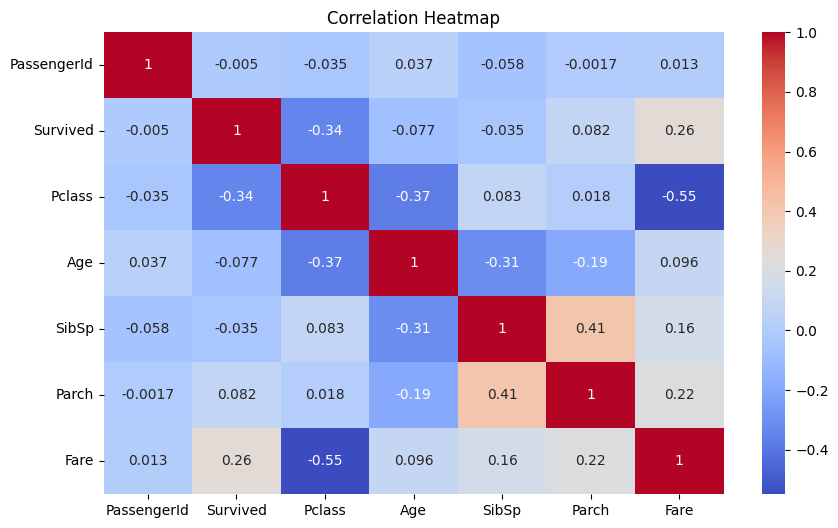

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
# Observation: Fare and Pclass are negatively correlated; Age has small positive correlation with survival.


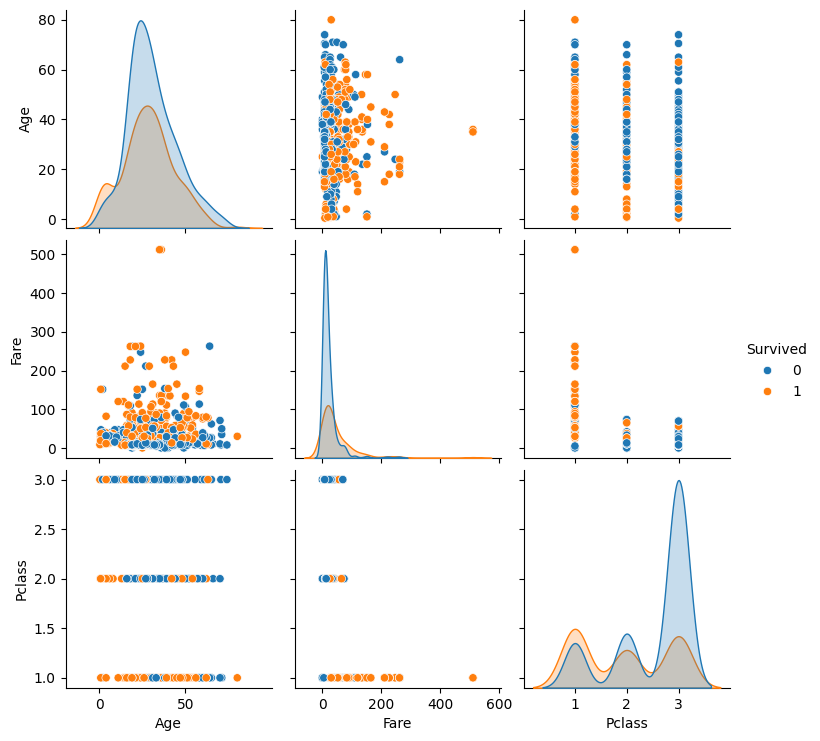

In [15]:
# ---------------------------
# 12. Pairplot (Selected Features)
# ---------------------------
sns.pairplot(df[["Age", "Fare", "Survived", "Pclass"]], hue="Survived")
plt.show()
# Observation: Survivors tend to cluster in lower fare ranges and younger ages.

In [18]:
# ---------------------------
# 13. PDF Export
# ---------------------------
numeric_df = df.select_dtypes(include=np.number)  # select only numeric columns

pdf_path = "titanic_eda_report.pdf"
with PdfPages(pdf_path) as pdf:
    # Survival Count
    plt.figure(); sns.countplot(x="Survived", data=df).set(title="Survival Count"); pdf.savefig(); plt.close()

    # Sex vs Survival
    plt.figure(); sns.countplot(x="Sex", hue="Survived", data=df).set(title="Survival by Gender"); pdf.savefig(); plt.close()

    # Pclass vs Survival
    plt.figure(); sns.countplot(x="Pclass", hue="Survived", data=df).set(title="Survival by Passenger Class"); pdf.savefig(); plt.close()

    # Age Distribution
    plt.figure(); sns.histplot(df["Age"].dropna(), bins=30, kde=True).set(title="Age Distribution"); pdf.savefig(); plt.close()

    # Age vs Survival
    plt.figure(); sns.boxplot(x="Survived", y="Age", data=df).set(title="Age vs Survival"); pdf.savefig(); plt.close()

    # Fare Distribution
    plt.figure(); sns.histplot(df["Fare"], bins=40, kde=True).set(title="Fare Distribution"); pdf.savefig(); plt.close()

    # Fare by Class
    plt.figure(); sns.boxplot(x="Pclass", y="Fare", data=df).set(title="Fare by Passenger Class"); pdf.savefig(); plt.close()

    # Heatmap (numeric only)
    plt.figure(figsize=(10,6)); sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm").set(title="Correlation Heatmap"); pdf.savefig(); plt.close()

print("PDF Report saved:", pdf_path)


PDF Report saved: titanic_eda_report.pdf


In [19]:
# ---------------------------
# 14. Download PDF
# ---------------------------
files.download(pdf_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>